In [1]:
#Return Series= Array of Percentage Changes in Stock Price
#used to normalise stock returns

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(20,10) #to set the graph range

In [3]:
stock = ("HDFCBANK.ns") #Stock Name and followed by Exchange

In [4]:
df=yf.download(tickers=stock,period="5y")

[*********************100%%**********************]  1 of 1 completed


In [5]:
df


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-10,1125.000000,1142.000000,1115.500000,1118.675049,1079.442383,54064350
2019-04-11,1122.449951,1131.500000,1118.474976,1128.750000,1089.164062,4396650
2019-04-12,1126.050049,1136.099976,1126.050049,1132.625000,1092.903198,4585222
2019-04-15,1135.000000,1146.449951,1132.175049,1144.400024,1104.265137,5109890
2019-04-16,1145.474976,1154.949951,1140.150024,1152.525024,1112.105103,4136888
...,...,...,...,...,...,...
2024-04-04,1504.000000,1530.000000,1504.000000,1527.599976,1527.599976,44467533
2024-04-05,1539.000000,1554.500000,1530.150024,1549.550049,1549.550049,29527951
2024-04-08,1554.949951,1557.250000,1541.550049,1546.599976,1546.599976,10241470


In [6]:
import matplotlib.pyplot as plt


<Axes: xlabel='Date'>

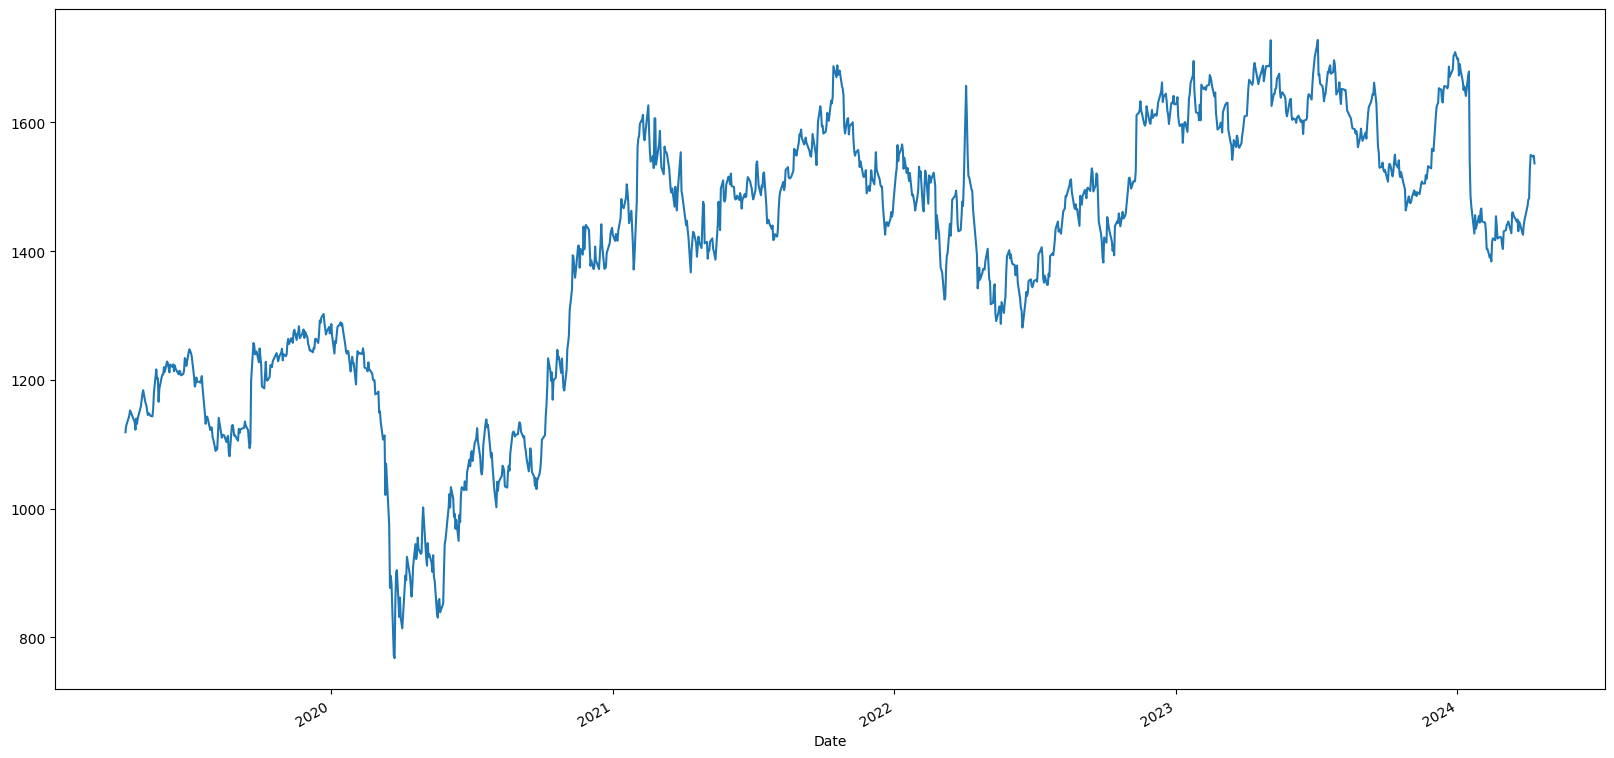

In [7]:
df["Close"].plot()

<Axes: xlabel='Date'>

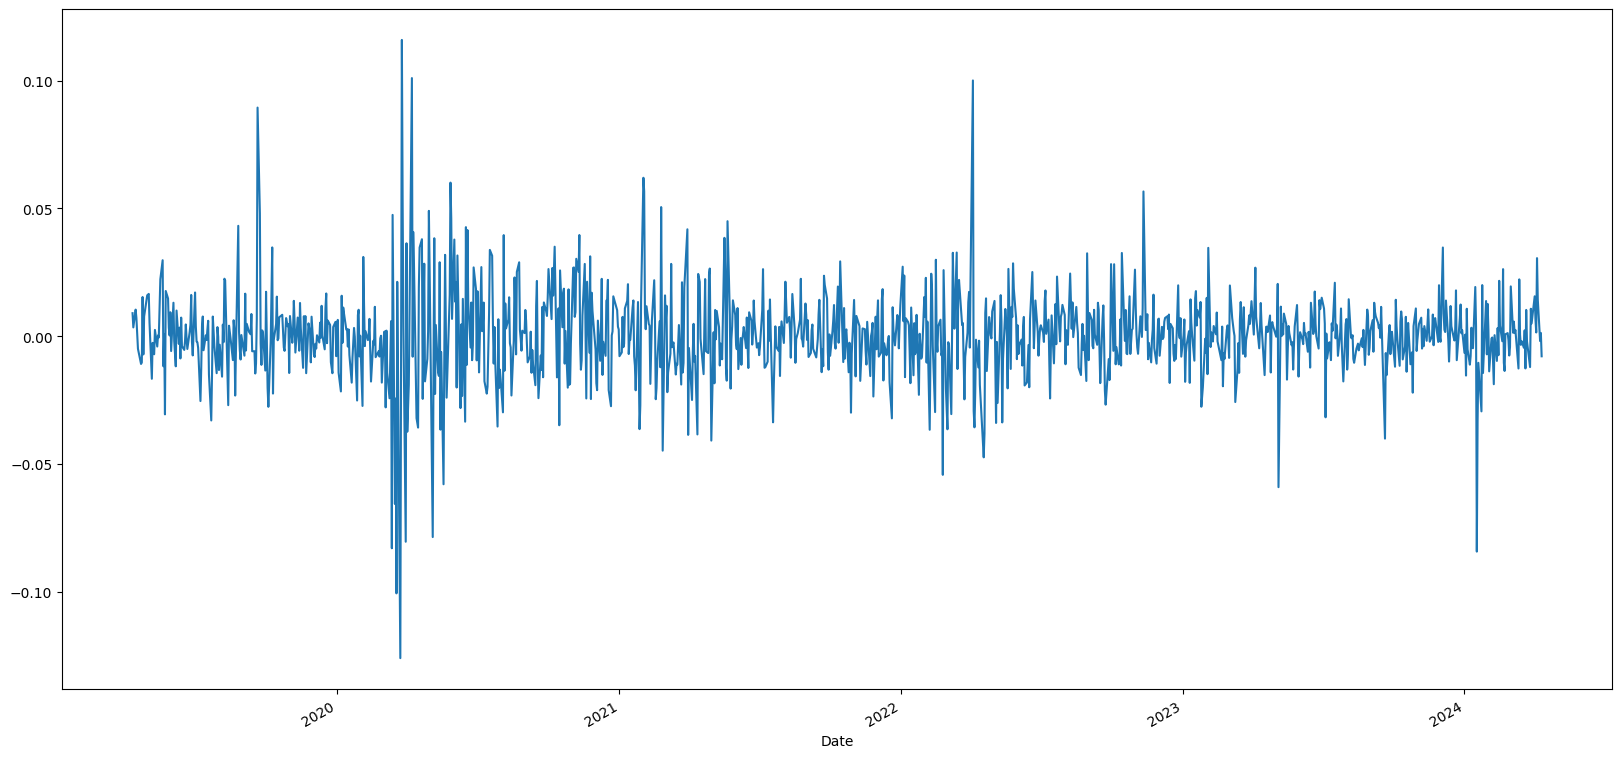

In [8]:
df["Close"].pct_change().plot()

In [9]:
stocks=['RELIANCE.ns','TCS.ns','AXISBANK.NS','HDFCBANK.ns','BAJFINANCE.NS','INFY.NS','KOTAKBANK.NS','TATASTEEL.NS','SUZLON.NS','TATAPOWER.NS']

In [10]:
Stocks=yf.download(tickers=stocks,period='5y')

[*********************100%%**********************]  10 of 10 completed


<Axes: xlabel='Date'>

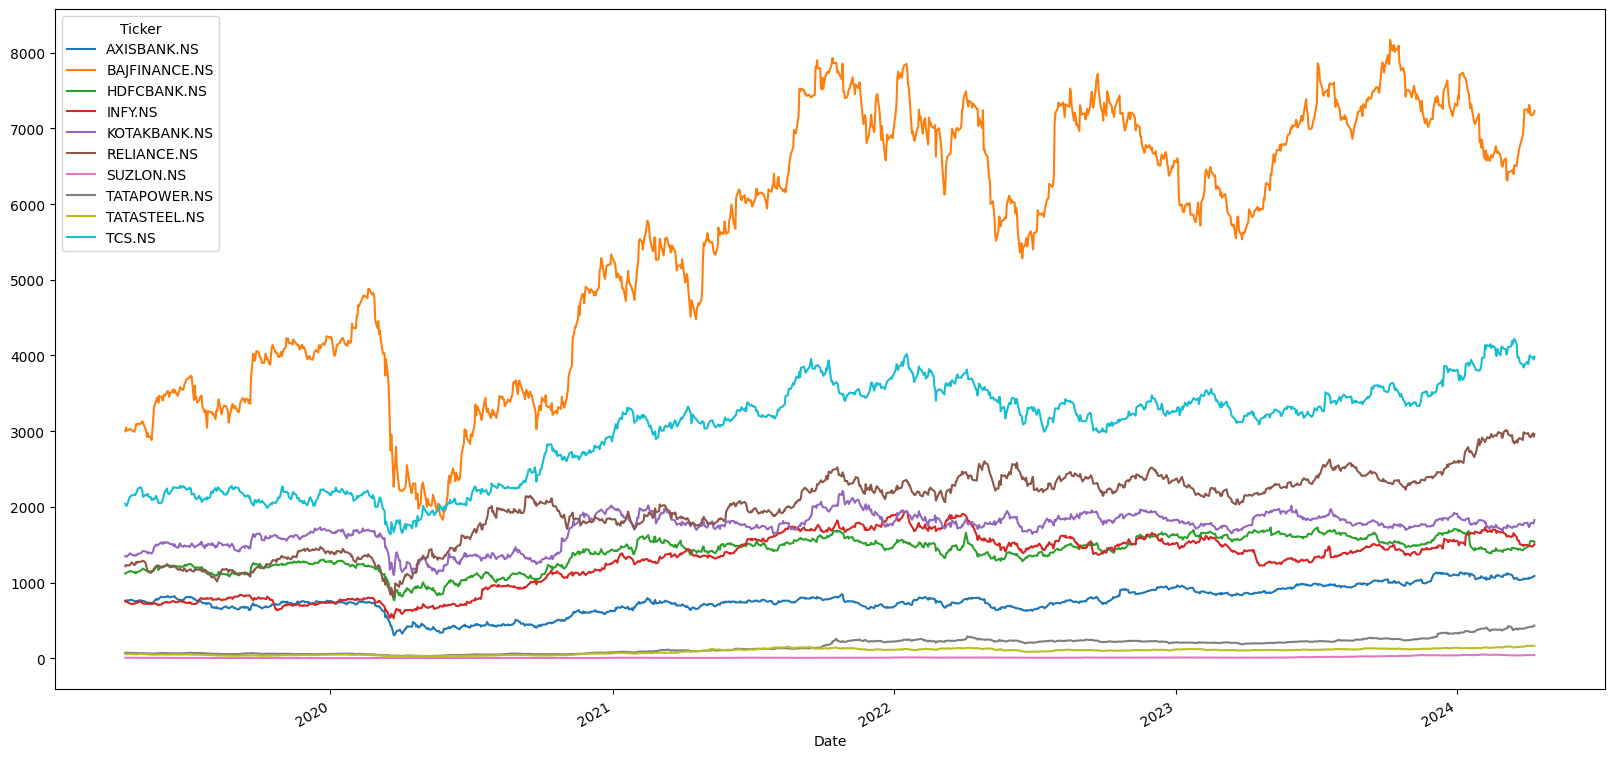

In [11]:
Stocks['Close'].plot()

In [12]:
#To get cumuative returns, take product of (1+%change) using np.cumprod()

In [13]:
np.cumprod(1+Stocks['Close'].pct_change())
           

Ticker,AXISBANK.NS,BAJFINANCE.NS,HDFCBANK.NS,INFY.NS,KOTAKBANK.NS,RELIANCE.NS,SUZLON.NS,TATAPOWER.NS,TATASTEEL.NS,TCS.NS
Date,,,,,,,,,,
2019-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-11,0.988763,1.016509,1.009006,0.986714,0.995037,1.011567,1.000000,1.025388,0.984019,0.989830
2019-04-12,1.004600,1.003485,1.012470,0.993424,0.995222,1.008788,1.074627,1.033145,0.980254,0.987379
2019-04-15,1.002629,1.007971,1.022996,0.966521,1.017742,1.006572,1.097015,1.006347,1.016073,1.035804
2019-04-16,1.013472,1.011390,1.030259,0.962003,1.027039,1.009276,1.097015,1.007757,1.016256,1.044872
...,...,...,...,...,...,...,...,...,...,...
2024-04-04,1.397056,2.429136,1.365544,1.975156,1.295763,2.403473,6.981432,5.840621,3.001469,1.962162
2024-04-05,1.391996,2.393199,1.385165,1.965059,1.322431,2.398832,6.932668,5.847673,3.000551,1.950374
2024-04-08,1.414274,2.394167,1.382528,1.961871,1.324839,2.441342,6.745738,5.872355,3.034533,1.947090


In [14]:
((np.cumprod(1+Stocks['Close'].pct_change())-1).iloc[-1]).sort_values()

Ticker
KOTAKBANK.NS     0.352656
HDFCBANK.NS      0.373366
AXISBANK.NS      0.429717
TCS.NS           0.953020
INFY.NS          1.001860
BAJFINANCE.NS    1.411410
RELIANCE.NS      1.430828
TATASTEEL.NS     2.031778
TATAPOWER.NS     5.092384
SUZLON.NS        5.851394
Name: 2024-04-10 00:00:00, dtype: float64

<Axes: xlabel='Ticker'>

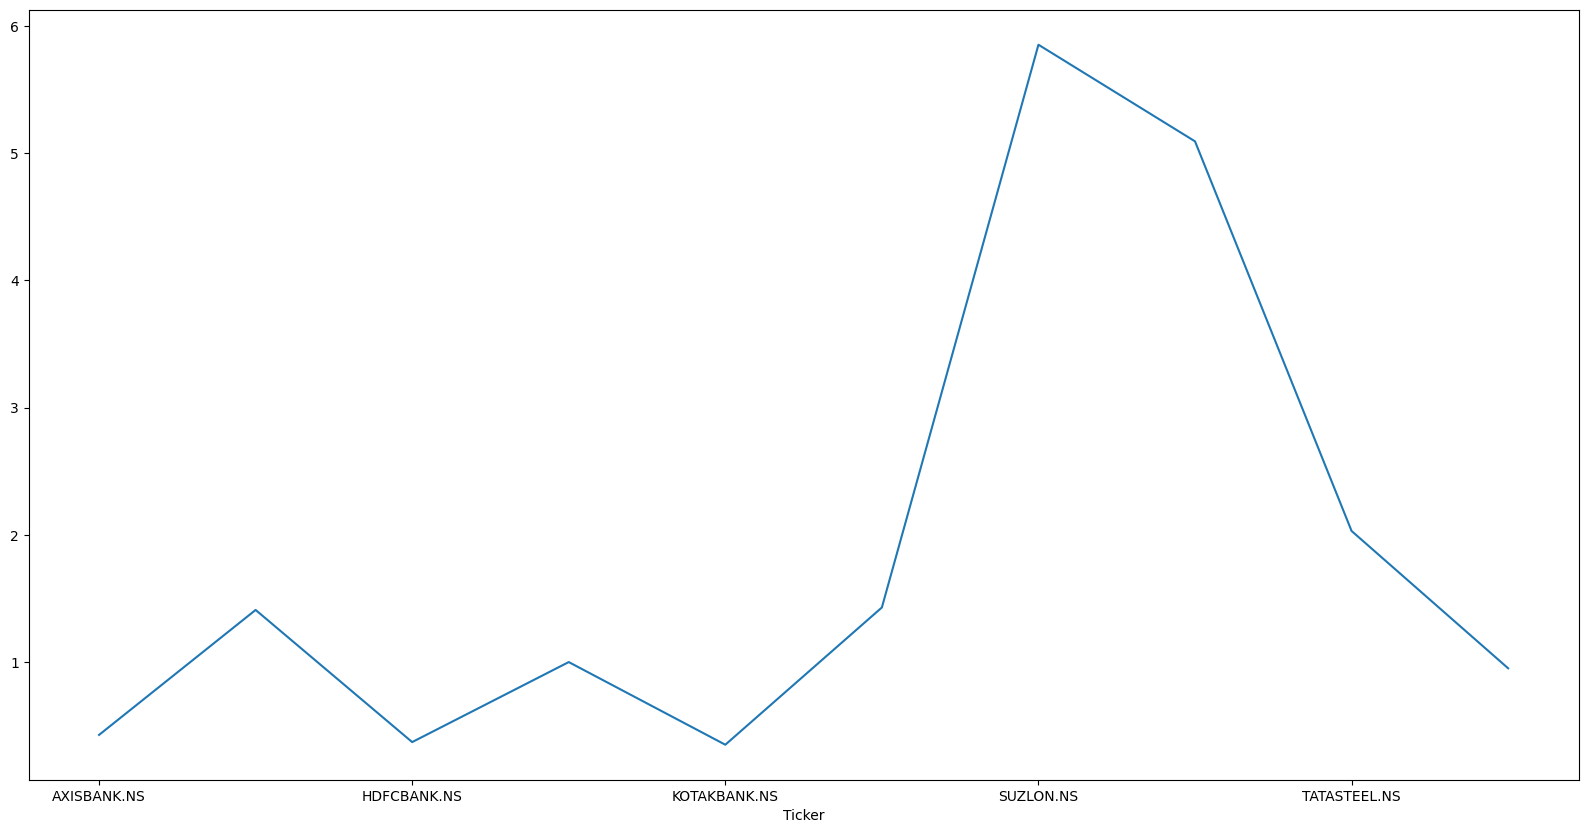

In [15]:
((np.cumprod(1+Stocks['Close'].pct_change())-1).iloc[-1]).plot()

<Axes: xlabel='Date'>

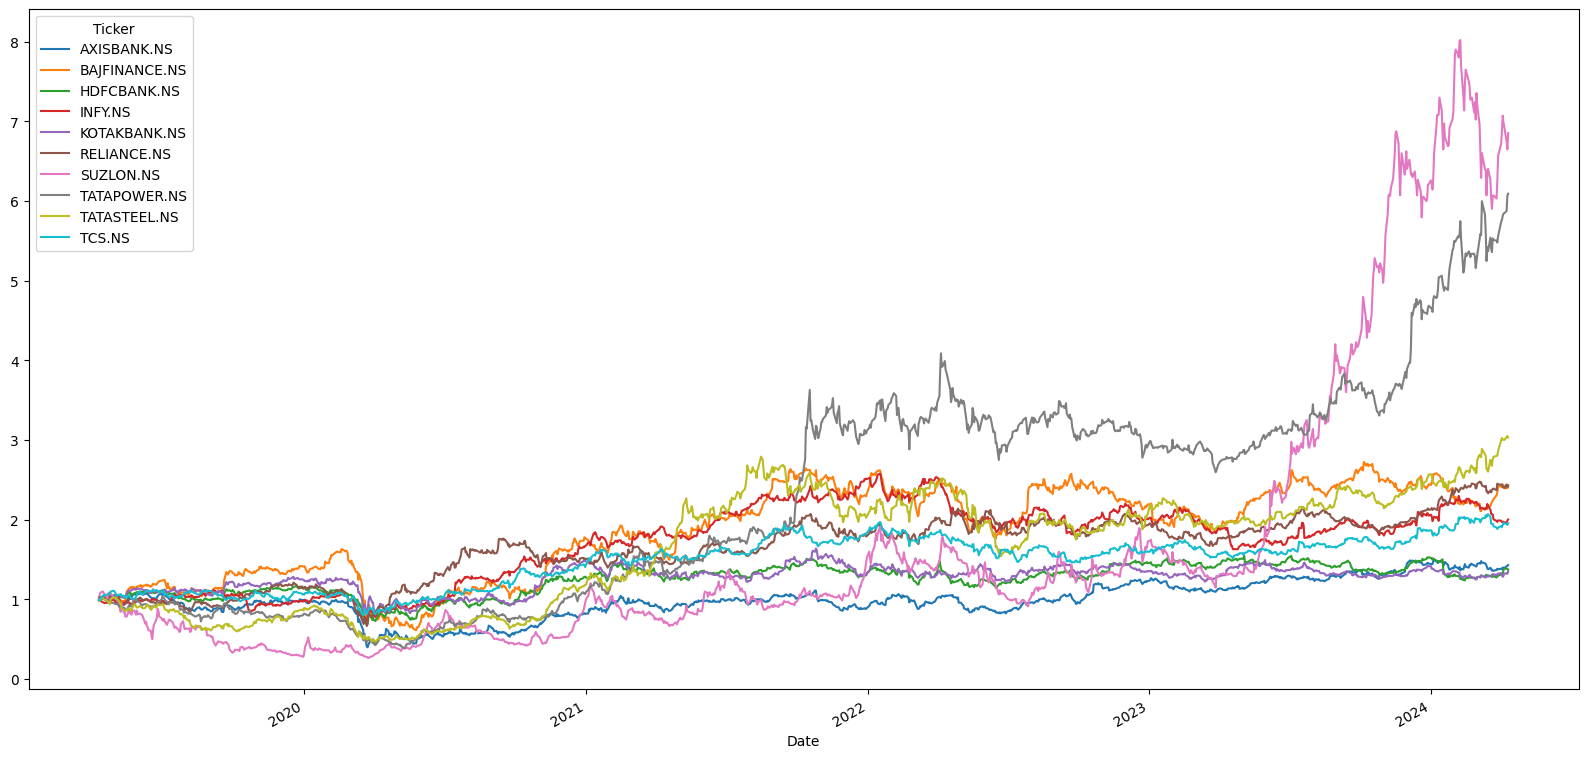

In [16]:
np.cumprod(1+Stocks['Close'].pct_change()).plot()

In [17]:
daily_returns=Stocks['Close'].pct_change()

#Resampling data to get annual returns
annual_returns=daily_returns.resample('Y').apply( lambda x:(x+1).prod()-1)

#Print Annual Returns
print("Annual Returns:")
annual_returns

Annual Returns:


Ticker,AXISBANK.NS,BAJFINANCE.NS,HDFCBANK.NS,INFY.NS,KOTAKBANK.NS,RELIANCE.NS,SUZLON.NS,TATAPOWER.NS,TATASTEEL.NS,TCS.NS
Date,,,,,,,,,,
2019-12-31,-0.008872,0.412360,0.137149,-0.028630,0.247759,0.137186,-0.723881,-0.203103,-0.132899,0.059527
2020-12-31,-0.177231,0.250416,0.129078,0.717568,0.184789,0.323681,2.459461,0.338938,0.363521,0.324305
2021-12-31,0.093642,0.317665,0.030008,0.503225,-0.099970,0.192842,0.593750,1.920687,0.726793,0.305860
2022-12-31,0.376096,-0.057630,0.100548,-0.201059,0.017343,0.075607,0.131780,-0.059968,0.013541,-0.128840
2023-12-31,0.180509,0.114453,0.049811,0.023008,0.044247,0.099481,2.603774,0.599182,0.239237,0.164799
2024-12-31,-0.013154,-0.013306,-0.101155,-0.023397,-0.043053,0.144761,0.103403,0.300467,0.182307,0.050417


In [18]:
Stocks['Adj Close']

Ticker,AXISBANK.NS,BAJFINANCE.NS,HDFCBANK.NS,INFY.NS,KOTAKBANK.NS,RELIANCE.NS,SUZLON.NS,TATAPOWER.NS,TATASTEEL.NS,TCS.NS
Date,,,,,,,,,,
2019-04-10,757.977844,2958.036621,1079.442261,668.978699,1346.582886,1192.868286,6.152033,65.413368,46.474377,1825.995605
2019-04-11,749.460083,3006.871338,1089.164062,660.090942,1339.899536,1206.666016,6.152033,67.074081,45.731670,1807.424683
2019-04-12,761.464661,2968.346191,1092.902954,664.579346,1340.148926,1203.350952,6.611140,67.581505,45.556667,1802.949951
2019-04-15,759.970276,2981.615234,1104.265137,646.581726,1370.473999,1200.707886,6.748872,65.828545,47.221344,1891.374268
2019-04-16,768.189087,2991.727783,1112.104980,643.559753,1382.993408,1203.933228,6.748872,65.920799,47.229885,1907.931641
...,...,...,...,...,...,...,...,...,...,...
2024-04-04,1062.949951,7283.399902,1527.599976,1486.699951,1749.150024,2925.850098,42.950001,414.100006,163.399994,4003.300049
2024-04-05,1059.099976,7175.649902,1549.550049,1479.099976,1785.150024,2920.199951,42.650002,414.600006,163.350006,3979.250000
2024-04-08,1076.050049,7178.549805,1546.599976,1476.699951,1788.400024,2971.949951,41.500000,416.350006,165.199997,3972.550049


In [19]:
#Sharpe Ratio tells about the risk adjusted return and the volatility in the stock
#Sharpe Ratio = (Returns-Risk Free returns)/Std Deviation
#risk adjusted return will be higher for lesser volatile graphs

In [20]:
#Bias is when the entire data set is shifted towards a particular side
#Variance

In [21]:
mean_percentage_change=Stocks.pct_change().mean()
standard_deviation=Stocks.pct_change().std()

In [22]:
Sharpe=mean_percentage_change/standard_deviation

In [23]:
Sharpe.sort_values(ascending=False)

Price      Ticker       
Volume     BAJFINANCE.NS    0.179184
           INFY.NS          0.178120
           KOTAKBANK.NS     0.173216
           RELIANCE.NS      0.169964
           TATAPOWER.NS     0.169916
           SUZLON.NS        0.165121
           AXISBANK.NS      0.154403
           TCS.NS           0.150894
           HDFCBANK.NS      0.144717
           TATASTEEL.NS     0.141996
High       TATAPOWER.NS     0.074538
Adj Close  TATAPOWER.NS     0.073604
Low        TATAPOWER.NS     0.072344
Close      TATAPOWER.NS     0.070938
Open       TATAPOWER.NS     0.066650
Adj Close  SUZLON.NS        0.058280
Close      SUZLON.NS        0.058280
High       SUZLON.NS        0.058188
Low        SUZLON.NS        0.056800
Open       SUZLON.NS        0.055231
Adj Close  TATASTEEL.NS     0.053955
High       TATASTEEL.NS     0.052938
Low        TATASTEEL.NS     0.050689
           RELIANCE.NS      0.050511
High       RELIANCE.NS      0.050465
Open       TATASTEEL.NS     0.048853
Close      TA

In [24]:
file_path=r"/Users/sahil/Downloads/nifty.csv"
Stocks=pd.read_csv(file_path)
Stocks

,Company Name,Industry,Symbol,Series,ISIN Code
0,ABB India Ltd.,Capital Goods,ABB,EQ,INE117A01022
1,Adani Energy Solutions Ltd.,Power,ADANIENSOL,EQ,INE931S01010
2,Adani Enterprises Ltd.,Metals & Mining,ADANIENT,EQ,INE423A01024
3,Adani Green Energy Ltd.,Power,ADANIGREEN,EQ,INE364U01010
4,Adani Ports and Special Economic Zone Ltd.,Services,ADANIPORTS,EQ,INE742F01042
...,...,...,...,...,...
96,Varun Beverages Ltd.,Fast Moving Consumer Goods,VBL,EQ,INE200M01021
97,Vedanta Ltd.,Metals & Mining,VEDL,EQ,INE205A01025
98,Wipro Ltd.,Information Technology,WIPRO,EQ,INE075A01022
99,Zomato Ltd.,Consumer Services,ZOMATO,EQ,INE758T01015


In [25]:
stocks=(Stocks['Symbol']+str('.ns')).to_list() #converting to list since "tickers" accepts only lists as parameters

In [26]:
ClosingPrice=yf.download(tickers=stocks,start="2014-1-1")["Close"]

[*********************100%%**********************]  101 of 101 completed


In [27]:
ClosingPrice

Ticker,ABB.NS,ADANIENSOL.NS,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,ATGL.NS,AWL.NS,...,TORNTPHARM.NS,TRENT.NS,TVSMOTOR.NS,ULTRACEMCO.NS,UPL.NS,VBL.NS,VEDL.NS,WIPRO.NS,ZOMATO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,622.881836,NaN,41.192673,NaN,156.300003,183.649994,969.299988,499.750000,NaN,NaN,...,234.975006,122.870003,73.349998,1769.250000,132.300003,NaN,202.000000,207.262558,NaN,159.750000
2014-01-02,610.534973,NaN,39.138786,NaN,152.649994,179.149994,930.549988,485.549988,NaN,NaN,...,234.975006,120.565002,78.099998,1731.099976,131.300003,NaN,199.850006,207.356308,NaN,157.330002
2014-01-03,604.997009,NaN,38.065861,NaN,149.899994,177.800003,951.950012,489.500000,NaN,NaN,...,234.649994,119.785004,78.949997,1727.199951,133.399994,NaN,199.149994,208.725052,NaN,156.149994
2014-01-06,607.584412,NaN,38.632977,NaN,150.850006,176.300003,945.700012,490.649994,NaN,NaN,...,234.524994,117.425003,76.650002,1724.300049,134.300003,NaN,198.949997,209.250046,NaN,157.529999
2014-01-07,600.820862,NaN,37.084900,NaN,145.949997,175.250000,932.099976,489.950012,NaN,NaN,...,235.800003,119.559998,74.900002,1690.199951,134.500000,NaN,194.500000,206.325058,NaN,160.889999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-04,6501.799805,1102.000000,3210.800049,1890.849976,1366.849976,624.700012,6440.600098,2918.300049,984.200012,354.500000,...,2537.550049,4003.199951,2086.699951,10005.099609,492.950012,1514.550049,309.950012,487.399994,187.000000,983.200012
2024-04-05,6669.850098,1096.300049,3224.800049,1901.949951,1375.550049,627.200012,6397.750000,2883.449951,979.000000,352.200012,...,2577.100098,3932.600098,2069.399902,9823.599609,494.350006,1493.750000,318.950012,485.049988,190.500000,1006.500000
2024-04-08,6699.750000,1075.849976,3224.550049,1919.099976,1348.650024,630.549988,6307.750000,2892.000000,966.799988,356.399994,...,2597.300049,3931.850098,2132.949951,9863.750000,489.049988,1450.099976,323.299988,479.899994,191.800003,1000.650024


In [28]:
ClosingPrice.dropna(axis=1,inplace=True) #use how= to remove if entire value has NA

In [29]:
ClosingPrice

Ticker,ABB.NS,ADANIENT.NS,ADANIPORTS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,...,TECHM.NS,TITAN.NS,TORNTPHARM.NS,TRENT.NS,TVSMOTOR.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS,WIPRO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,622.881836,41.192673,156.300003,183.649994,969.299988,499.750000,258.440002,1917.400024,76.010002,157.029999,...,457.024994,230.800003,234.975006,122.870003,73.349998,1769.250000,132.300003,202.000000,207.262558,159.750000
2014-01-02,610.534973,39.138786,152.649994,179.149994,930.549988,485.549988,254.460007,1900.050049,72.834999,156.919998,...,454.024994,226.350006,234.975006,120.565002,78.099998,1731.099976,131.300003,199.850006,207.356308,157.330002
2014-01-03,604.997009,38.065861,149.899994,177.800003,951.950012,489.500000,252.179993,1895.550049,72.930000,155.550003,...,458.875000,227.399994,234.649994,119.785004,78.949997,1727.199951,133.399994,199.149994,208.725052,156.149994
2014-01-06,607.584412,38.632977,150.850006,176.300003,945.700012,490.649994,251.259995,1888.300049,73.169998,155.145004,...,453.962494,227.800003,234.524994,117.425003,76.650002,1724.300049,134.300003,198.949997,209.250046,157.529999
2014-01-07,600.820862,37.084900,145.949997,175.250000,932.099976,489.950012,246.850006,1889.949951,73.105003,155.404999,...,451.012512,226.050003,235.800003,119.559998,74.900002,1690.199951,134.500000,194.500000,206.325058,160.889999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-04,6501.799805,3210.800049,1366.849976,624.700012,6440.600098,2918.300049,1062.949951,9146.150391,1655.800049,7283.399902,...,1279.250000,3782.750000,2537.550049,4003.199951,2086.699951,10005.099609,492.950012,309.950012,487.399994,983.200012
2024-04-05,6669.850098,3224.800049,1375.550049,627.200012,6397.750000,2883.449951,1059.099976,9009.500000,1677.949951,7175.649902,...,1263.400024,3754.449951,2577.100098,3932.600098,2069.399902,9823.599609,494.350006,318.950012,485.049988,1006.500000
2024-04-08,6699.750000,3224.550049,1348.650024,630.549988,6307.750000,2892.000000,1076.050049,9030.500000,1689.150024,7178.549805,...,1265.150024,3748.899902,2597.300049,3931.850098,2132.949951,9863.750000,489.049988,323.299988,479.899994,1000.650024


In [30]:
mean_percentage_change=ClosingPrice.pct_change().mean()
standard_deviation=ClosingPrice.pct_change().std()
Sharpe=mean_percentage_change/standard_deviation
Sharpe.sort_values(ascending=False)

Ticker
SRF.NS           0.082404
BAJFINANCE.NS    0.077212
TRENT.NS         0.074103
TVSMOTOR.NS      0.072092
BAJAJFINSV.NS    0.068849
                   ...   
BANKBARODA.NS    0.023883
VEDL.NS          0.022356
COALINDIA.NS     0.018766
ONGC.NS          0.017172
PNB.NS           0.014399
Length: 79, dtype: float64

In [31]:
cumprod_series=np.cumprod(1+ClosingPrice.pct_change())

<Axes: xlabel='Date'>

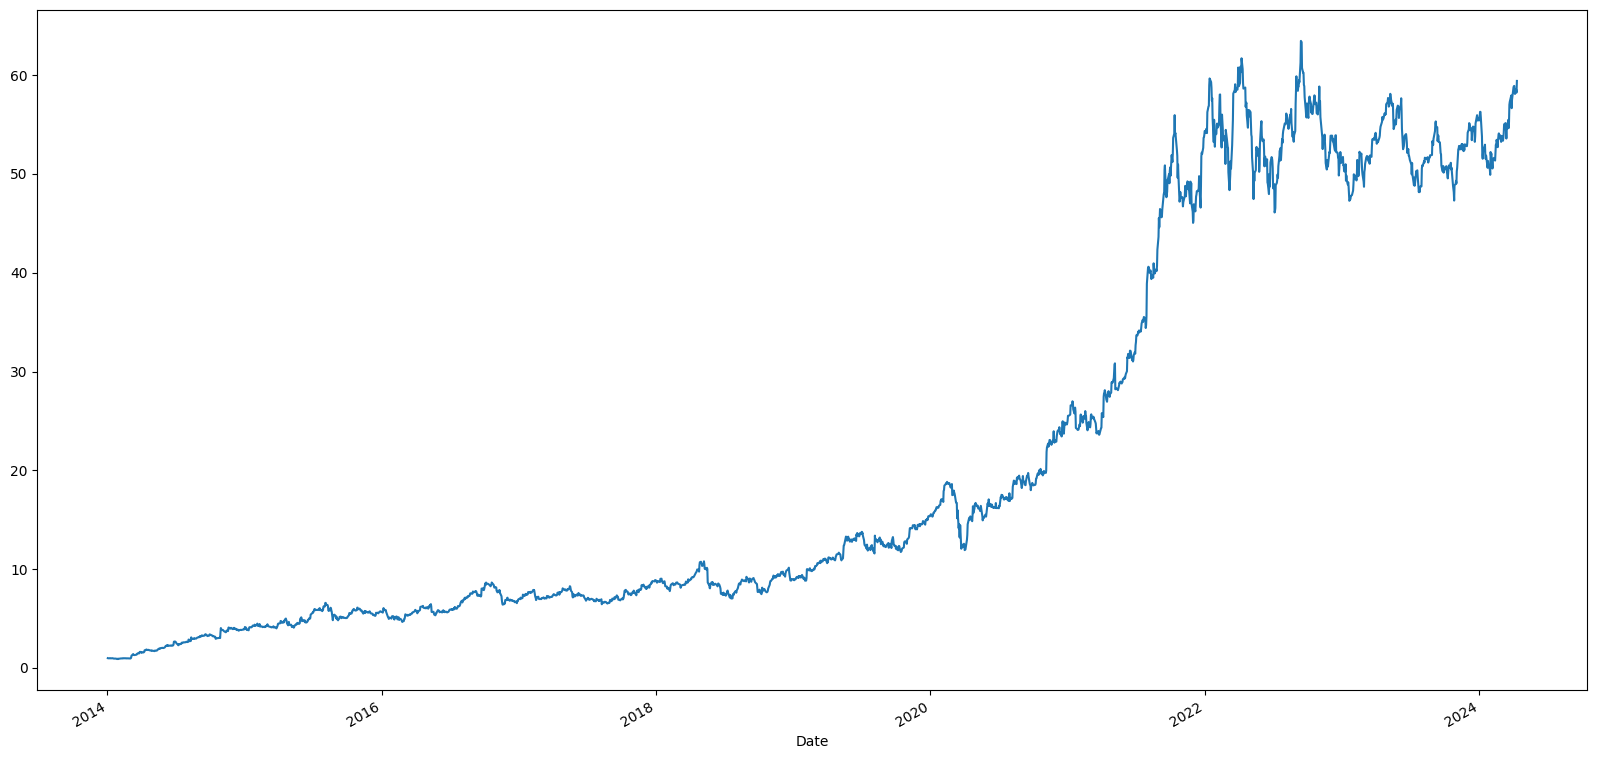

In [32]:
cumprod_series['SRF.NS'].plot()


In [33]:
standard_deviation.sort_values(ascending=False)

Ticker
ADANIENT.NS      0.033911
JINDALSTEL.NS    0.032609
DLF.NS           0.028942
VEDL.NS          0.028033
CANBK.NS         0.027487
                   ...   
DABUR.NS         0.014834
NESTLEIND.NS     0.014700
HINDUNILVR.NS    0.014231
HDFCBANK.NS      0.014206
COLPAL.NS        0.013706
Length: 79, dtype: float64

<Axes: xlabel='Date'>

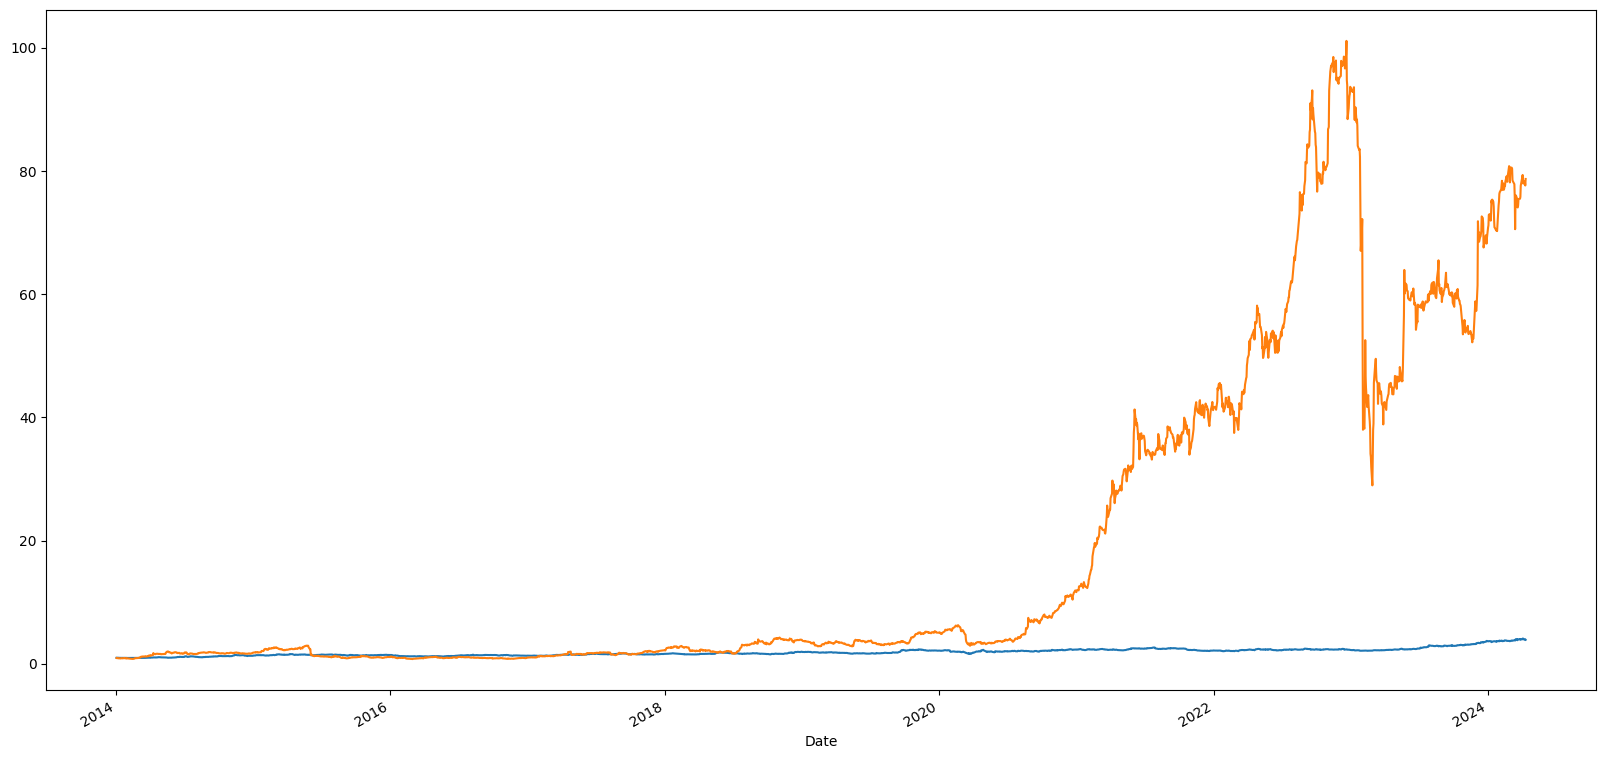

In [34]:
cumprod_series['COLPAL.NS'].plot()
cumprod_series['ADANIENT.NS'].plot()

In [35]:
#Low volatitlity does not mean safe risk free returns always

In [36]:
Sharpe['ADANIENT.NS'],Sharpe['COLPAL.NS'] #Despite low volatility, low returns => Low Sharpe
#Sharpe ratio used to analyse stocks and reporting stocks but not inversting persay

(0.06812892971890065, 0.04606849482204885)

In [37]:
mean_percentage_change.sort_values(ascending=False)

Ticker
ADANIENT.NS      0.002310
SRF.NS           0.001869
BAJFINANCE.NS    0.001781
TRENT.NS         0.001613
CHOLAFIN.NS      0.001592
                   ...   
WIPRO.NS         0.000456
ITC.NS           0.000409
PNB.NS           0.000394
ONGC.NS          0.000369
COALINDIA.NS     0.000363
Length: 79, dtype: float64